In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [13]:
def random_walker_2D(N: int=1000, px=0.5, py=0.5):
    """
    Takes a positive integer number of steps as N (default 1000) and returns two arrays:
    one for the x axis and one for the y axis. The arrays show the path taken by a random walker
    that takes +1 or -1 step in the x and y directions, respectively.

    N: number of steps (equal number of steps in the x and y directions)

    px: probability of taking a step in the +x direction

    py: probability of taking a step in the +y direction
    """


    x_position = np.cumsum((2 * (np.random.random(N) < px) - 1))
    y_position = np.cumsum((2 * (np.random.random(N) < py) - 1))
    return x_position, y_position

In [ ]:
"""
Coming up with a simple code
"""


# 40 seconds for 200x200 image and 2000 samples
# 100 seconds for 200x200 image and 5000 samples
# It is O(N)
# The length of the linear seed is image_length:
image_length = 200
image_height = 200
# Each pixel in the image corresponds to a matrix element:
image_matrix = np.zeros((image_height, image_length))
# Putting the linear seed in the last row of the matrix.
# We can put different and arbitrary seeds in place in this step.
# It basically sets the different boundary conditions.
image_matrix[-1] = 1
# Number of random walkers released into the matrix:
num_samples = 5000
# The color; it will change dynamically:
color = 2
# The main part of the code:
for sample in range(num_samples):
    if sample%500==0:
        color += 1
    # Initiate a random walker:
    rw = random_walker_2D(N=1000)
    # rwx contains the randoms walkers positions in the x direction, rwy the y direction.
    # We release the walker from random x positions on the image,
    # and from 10 positions above the highest branch of particles.
    rwx = rw[0] + np.random.randint(0,image_length)
    rwy = rw[1] + np.min(np.nonzero(image_matrix)[0]) - 10
    for i,j in zip(rwy,rwx):
        # Getting rid of the walkers that have gone too far away (further than this radius):
        if (i**2 + j**2) > ((image_length+image_height)**2):
            break
        # If the particle is inside the image matrix, check its 8 neighbors in every step:
        elif i in range(1, image_height-1) and j in range(1, image_length-1):
            if (image_matrix[i,j-1]!=0) or (image_matrix[i,j+1]!=0) or (image_matrix[i-1,j]!=0) or (image_matrix[i+1,j]!=0):
                # The random walker stops and leaves its mark on the image,
                # so we break from the loop and release a new walker.
                image_matrix[i,j] = color
                break
        # If it is not too far away and is not in the image, let it continue its walk
        # with the hope of getting back inside the image:
        else:
            continue

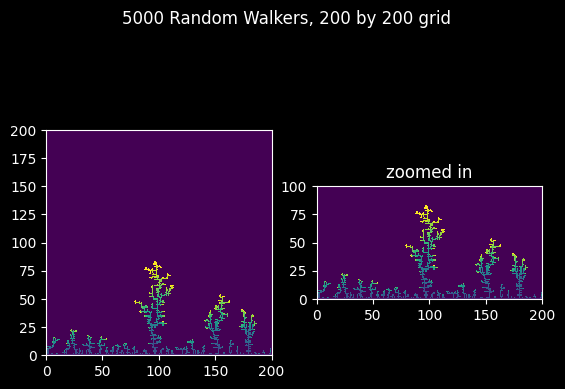

In [401]:
"""
Plot the simple code:
"""


# image_matrix_copy = image_matrix.copy()
fig, ax = plt.subplots(1,2)
fig.suptitle("5000 Random Walkers, 200 by 200 grid")
ax[0].imshow(image_matrix_copy, interpolation="none", extent=[0,200,0,200])
ax[1].imshow(image_matrix_copy[100:], interpolation="none", extent=[0,200,0,100])
ax[1].set_title("zoomed in");

In [463]:
"""
Turning it into a function:
"""


def diff_lim_agg(image_length: int=200, image_height: int=200, num_samples: int=5000,
                 num_colors: int=5, color_change: int=1000, N: int=1000):
    """
    Returns a matrix for diffusion-limited aggregation.

    image_length: the length of the linear seed

    num_samples = number of random walkers released into the matrix

    num_colors: number of colors that will be used in the image

    color_change: after how many random walkers released, should the color change?

    N: number of random walk steps
    """


    image_matrix = np.zeros((image_height, image_length), dtype=int)
    image_matrix[-1] = 1

    # The color; it will change dynamically. background color is 0, seed color is 1,
    # random walkers' colors are >=2.
    color = 2
    for sample in range(num_samples):
        # Change color:
        if ((sample+1)%color_change)==0:
            color = int((((sample+1)//color_change) % num_colors) + 2)
        # Initiate a random walker:
        rw = random_walker_2D(N=N)
        # rwx contains the randoms walkers positions in the x direction, rwy the y direction.
        # We release the walker from random x positions on the image,
        # and from 10 positions above the highest branch of particles.
        rwx = rw[0] + np.random.randint(0,image_length)
        rwy = rw[1] + np.min(np.nonzero(image_matrix)[0]) - 10
        for i,j in zip(rwy,rwx):
            # Getting rid of the walkers that have gone too far away (further than this radius):
            if (i**2 + j**2) > ((image_length+image_height)**2):
                break
            # If the particle is inside the image matrix, check its 8 neighbors in every step:
            elif i in range(1, image_height-1) and j in range(1, image_length-1):
                if (image_matrix[i,j-1]!=0) or (image_matrix[i,j+1]!=0) or (image_matrix[i-1,j]!=0) or (image_matrix[i+1,j]!=0):
                    # The random walker stops and leaves its mark on the image,
                    # so we break from the loop and release a new walker.
                    image_matrix[i,j] = color
                    break
            # If it is not too far away and is not in the image, let it continue its walk
            # with the hope of getting back inside the image:
            else:
                continue
    return image_matrix

In [375]:
# Takes 25 seconds.
image_length = 100
image_height = 100
num_samples = 3000
num_colors = 5
color_change = 1000


image_matrix = diff_lim_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

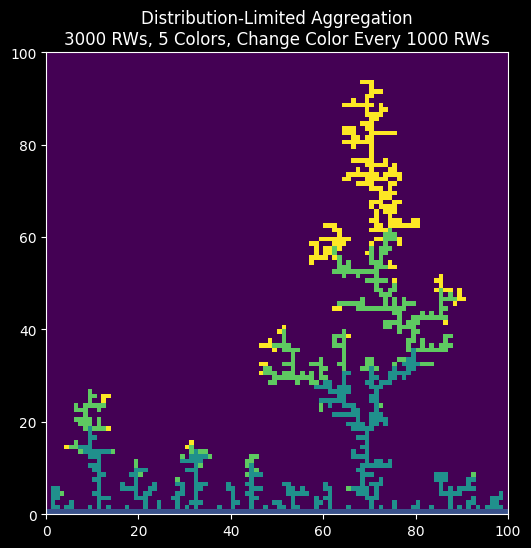

In [382]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution-Limited Aggregation\
\n3000 RWs, 5 Colors, Change Color Every 1000 RWs")
ax.imshow(image_matrix, interpolation="none", extent=[0,image_length,0,image_height]);

In [383]:
# fig.savefig("Exercise4_6_1.jpg")

In [384]:
# Takes 36 seconds.
image_length = 200
image_height = 100
num_samples = 3000
num_colors = 2
color_change = 300


image_matrix = diff_lim_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

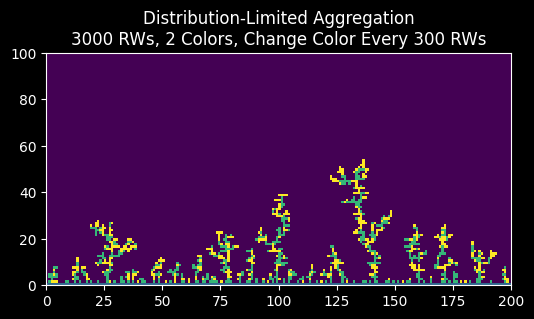

In [385]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution-Limited Aggregation\
\n3000 RWs, 2 Colors, Change Color Every 300 RWs")
ax.imshow(image_matrix, interpolation="none", extent=[0,image_length,0,image_height]);

In [386]:
# fig.savefig("Exercise4_6_2.jpg")

In [387]:
# Takes 80 seconds.
image_length = 200
image_height = 150
num_samples = 5000
num_colors = 10
color_change = 500


image_matrix = diff_lim_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

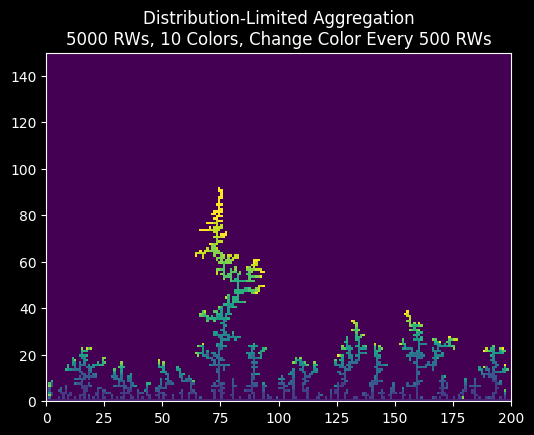

In [395]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution-Limited Aggregation\
\n5000 RWs, 10 Colors, Change Color Every 500 RWs")
ax.imshow(image_matrix, interpolation="none", extent=[0,image_length,0,image_height]);

In [396]:
# fig.savefig("Exercise4_6_3.jpg")

In [397]:
# Takes 150 seconds.
image_length = 200
image_height = 200
num_samples = 8000
num_colors = 20
color_change = 400


image_matrix = diff_lim_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

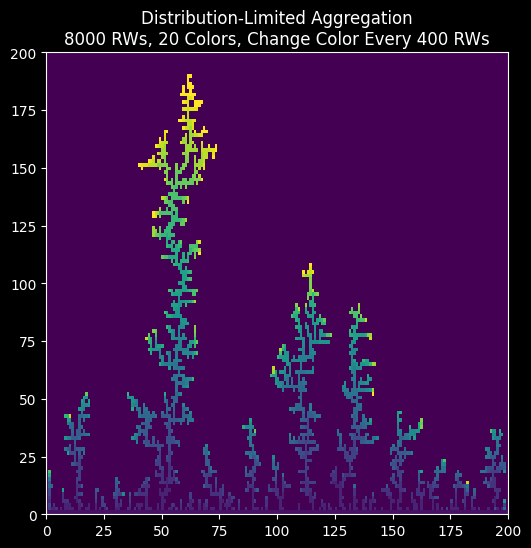

In [400]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution-Limited Aggregation\
\n8000 RWs, 20 Colors, Change Color Every 400 RWs")
ax.imshow(image_matrix[75:], interpolation="none", extent=[0,image_length,0,image_height]);

In [399]:
# fig.savefig("Exercise4_6_4.jpg")

$\Huge Dot \ Seed$

In [462]:
"""
Dot seed instead of linear seed:
"""


def dot_agg(image_length: int=200, image_height: int=200, num_samples: int=5000,
            num_colors: int=5, color_change: int=1000, N: int=1000):
    """
    Returns a Matrix for Diffusion-Limited Aggregation with a Dot Seed.

    image_length: the length of the linear seed

    num_samples = number of random walkers released into the matrix

    num_colors: number of colors that will be used in the image

    color_change: after how many random walkers released, should the color change?

    N: number of random walk steps
    """


    image_matrix = np.zeros((image_height, image_length), dtype=int)
    image_matrix[image_height//2, image_length//2] = 1

    # The color; it will change dynamically. background color is 0, seed color is 1,
    # random walkers' colors are >=2.
    color = 2
    for sample in range(num_samples):
        # Change color:
        if ((sample+1)%color_change)==0:
            color = int((((sample+1)//color_change) % num_colors) + 2)
        # Initiate a random walker:
        rw = random_walker_2D(N=N)
        # Choose a side of the image randomly to release the walker:
        side = np.random.choice([1,2,3,4])  # top - right - bottom - left
        if side==1:  # top:
            rwx = rw[0] + np.random.randint(0,image_length)
            rwy = rw[1] + np.min(np.nonzero(image_matrix)[0]) - 10
        elif side==2:  # right:
            rwx = rw[0] + np.max(np.nonzero(image_matrix)[1]) + 10
            rwy = rw[1] + np.random.randint(0,image_height)
        elif side==3:  # bottom:
            rwx = rw[0] + np.random.randint(1,image_length+1)
            rwy = rw[1] + np.max(np.nonzero(image_matrix)[0]) + 10
        elif side==4:  # left:
            rwx = rw[0] + np.min(np.nonzero(image_matrix)[1]) - 10
            rwy = rw[1] + np.random.randint(1,image_height+1)
        for i,j in zip(rwy,rwx):
            # Getting rid of the walkers that have gone too far away (further than this radius):
            if ((i - image_height//2)**2 + (j-image_length//2)**2) > ((image_length//2+image_height//2)**2):
                break
            # If the particle is inside the image matrix, check its 8 neighbors in every step:
            elif i in range(1, image_height-1) and j in range(1, image_length-1):
                if (image_matrix[i,j-1]!=0) or (image_matrix[i,j+1]!=0) or (image_matrix[i-1,j]!=0) or (image_matrix[i+1,j]!=0):
                    # The random walker stops and leaves its mark on the image,
                    # so we break from the loop and release a new walker.
                    image_matrix[i,j] = color
                    break
            # If it is not too far away and is not in the image, let it continue its walk
            # with the hope of getting back inside the image:
            else:
                continue
    return image_matrix

In [414]:
# Takes 3 minutes 8 seconds.
image_length = 200
image_height = 200
num_samples = 10_000
num_colors = 100
color_change = 100


image_matrix = dot_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

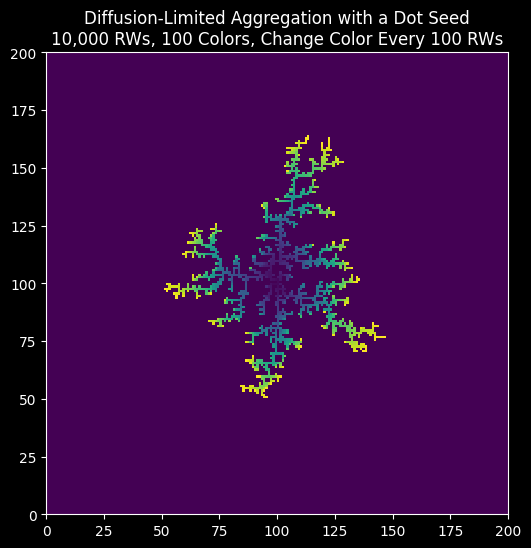

In [431]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Diffusion-Limited Aggregation with a Dot Seed\
\n10,000 RWs, 100 Colors, Change Color Every 100 RWs")
ax.imshow(image_matrix, interpolation="none", extent=[0,image_length,0,image_height]);

In [432]:
# fig.savefig("Exercise4_6_5.jpg")

In [435]:
# Takes 32 minutes 46 seconds.
image_length = 400
image_height = 400
num_samples = 50_000
num_colors = 100
color_change = 500


image_matrix50_000 = dot_agg(image_length=image_length, image_height=image_height, num_samples=num_samples,
                            num_colors=num_colors, color_change=color_change)

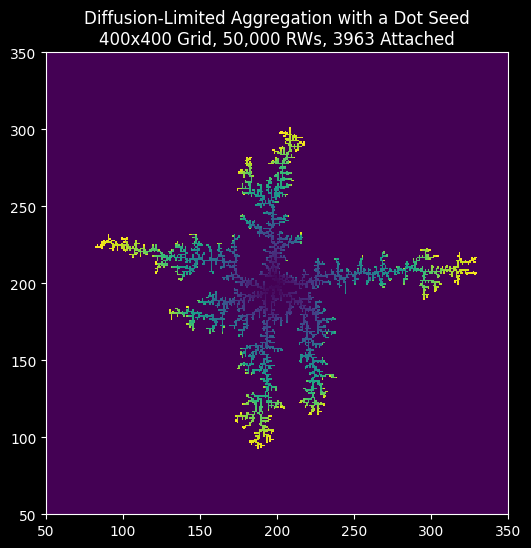

In [473]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title(f"Diffusion-Limited Aggregation with a Dot Seed\
\n400x400 Grid, 50,000 RWs, {int(np.sum(image_matrix50_000>0))} Attached")
ax.imshow(image_matrix50_000[50:350,50:350], interpolation="none", extent=[50,350,50,350]);

In [474]:
# fig.savefig("Exercise4_6_6.jpg")

In [445]:
black_white_50_000 = image_matrix50_000.copy()
black_white_50_000[black_white_50_000>0] = 1

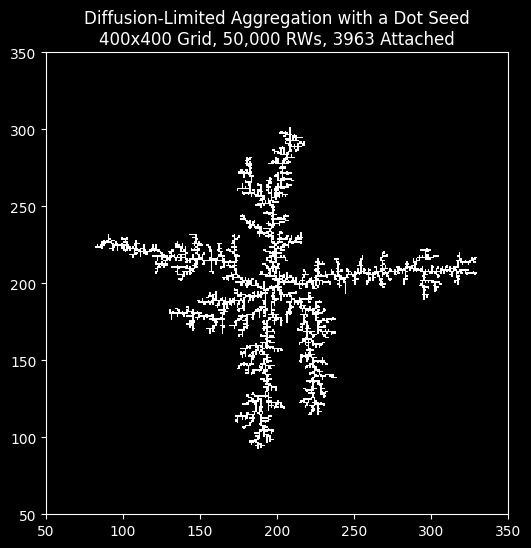

In [471]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title(f"Diffusion-Limited Aggregation with a Dot Seed\
\n400x400 Grid, 50,000 RWs, {int(np.sum(image_matrix50_000>0))} Attached")
ax.imshow(black_white_50_000[50:350,50:350], interpolation="none", extent=[50,350,50,350], cmap="gray");

In [472]:
# fig.savefig("Exercise4_6_7.jpg")